#Campus Recruitment Prediction With Machine Learning for MBA Students


 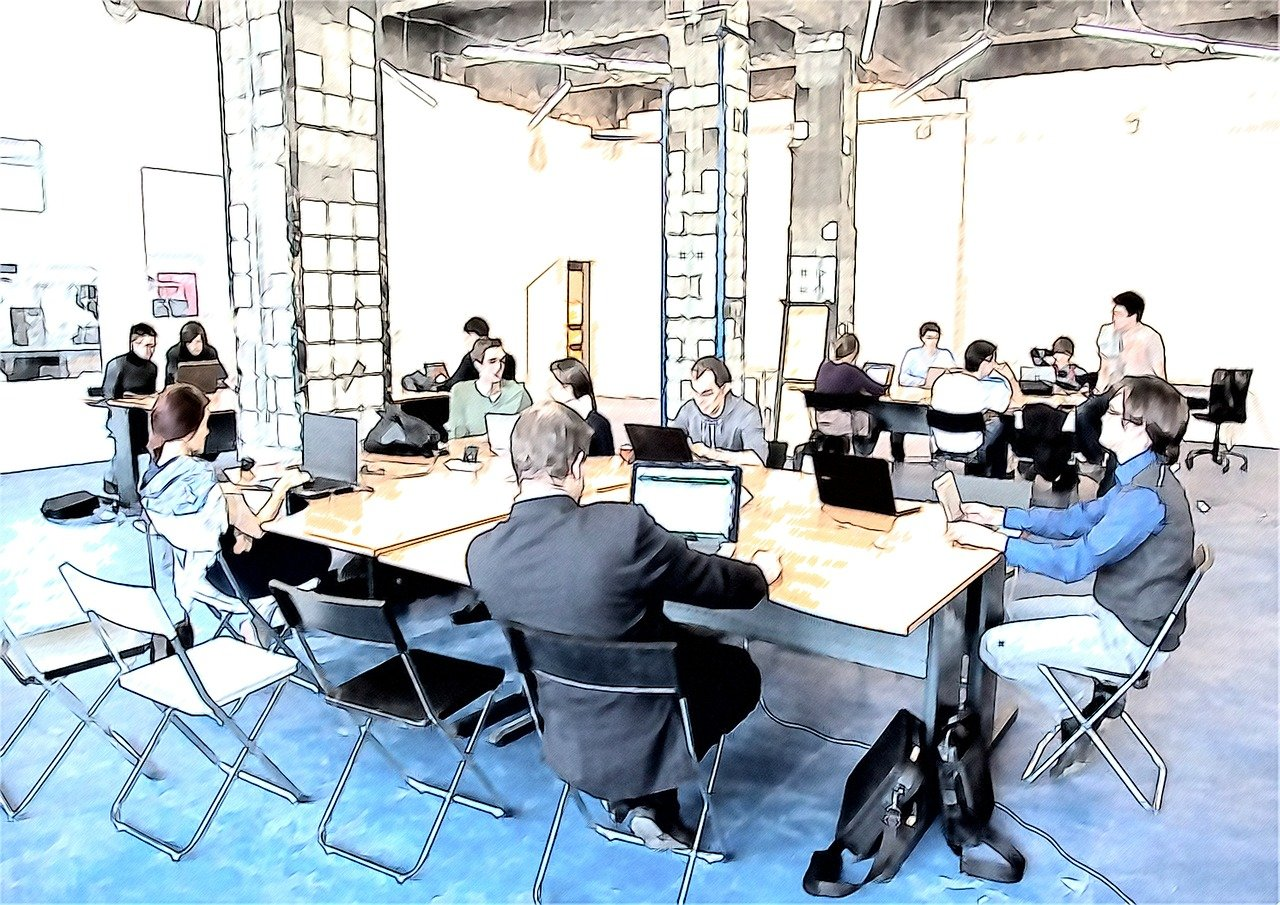

**Student Name: Dissanayake D.K.R.C.K.** <br>
**Registration Number: EG/2020/3910** <br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [4]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


## Data Loading

In [5]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to


### load the data.
df = pd.read_csv("Placement_Data_Full_Class.csv")

### Print the first five rows of the loaded dataframe
print(df.head())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [6]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here

# Drop the 'sl_no' column
df.drop('sl_no', axis=1, inplace=True)
print(df.head())


  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


## Exploratory Data Analysis (EDA)

In [7]:
# Identify the shape of the loaded dataframe

# Your code goes here

print("Shape of the dataframe:", df.shape)


Shape of the dataframe: (215, 14)


In [8]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:**

**Categorical Features:**
gender,
ssc_b,
hsc_b,
hsc_s,
degree_t,
workex,
specialisation ,
status ,

**Numerical Features:**
ssc_p ,
hsc_p ,
degree_p ,
etest_p ,
mba_p ,
salary ,

In [9]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here

df.describe()


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:**
Splitting data into train and test sets, utilizing only the train set for visualizations prevents data leakage, maintaining model generalization by avoiding bias from unseen data insights.

In [10]:

from sklearn.model_selection import train_test_split

# Separate independent variables (features) and dependent variable (target)
X = df.drop('status', axis=1)  # Independent variables
y = df['status']  # Dependent variable

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (172, 13)
Shape of X_test: (43, 13)
Shape of y_train: (172,)
Shape of y_test: (43,)


In [11]:
# Print number of training data points

# Your code goes here

print("Number of training data points:", X_train.shape[0])


Number of training data points: 172


In [12]:
# Print number of testing data points

# Your code goes here

print("Number of testing data points:", X_test.shape[0])


Number of testing data points: 43


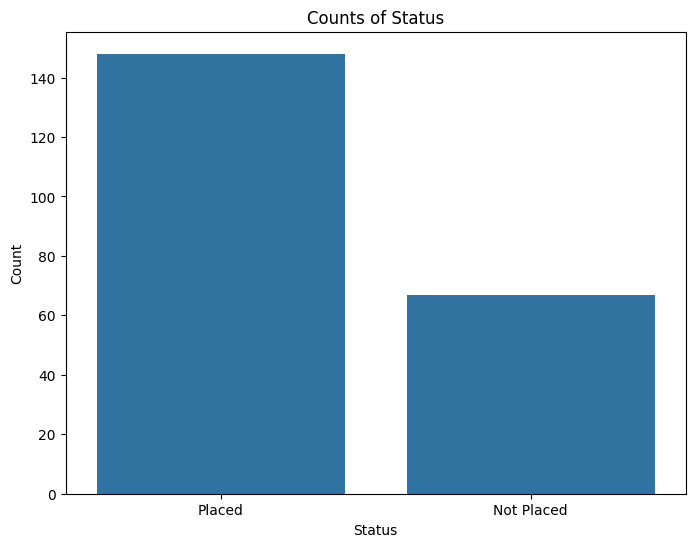

In [13]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here

# Plot counts of 'status' using seaborn countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status')
plt.title('Counts of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A: The data set is imbalnaced** <br>

1. Model is biased to major class in training
2. Not suitable to represent minority class
3. Difficult to capture rare events




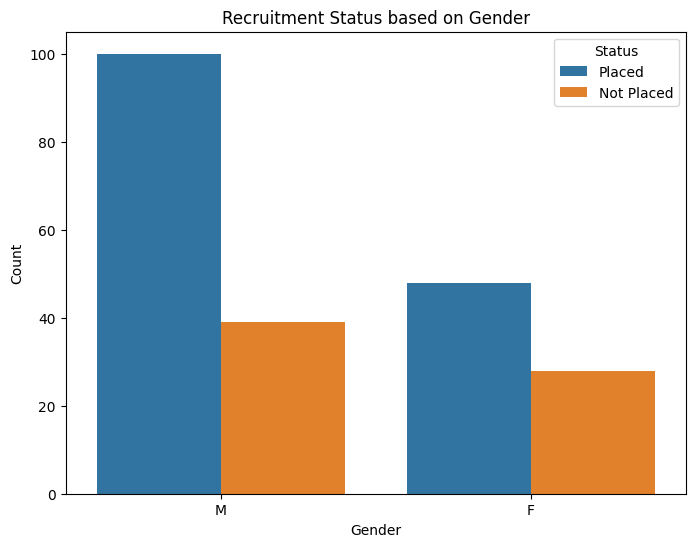

In [14]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='status')
plt.title('Recruitment Status based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


**Q:** Explain the observation from the above table.
> **A:**
Consitdering above graph we can see there are more male are placed than females. Also we can see the total number of males are higher than females. So the dataset is imbalanced with the gender.

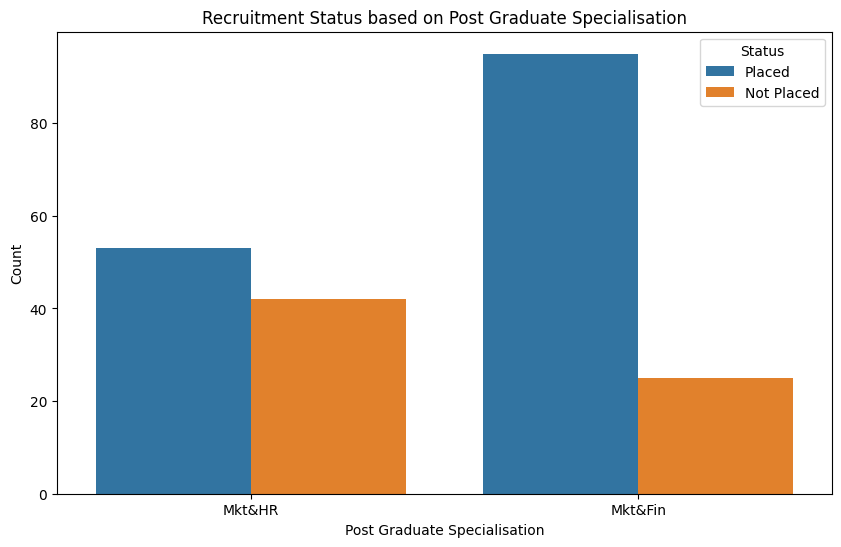

In [15]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
# Plot recruitment status based on Post Graduate Specialisation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='specialisation', hue='status')
plt.title('Recruitment Status based on Post Graduate Specialisation')
plt.xlabel('Post Graduate Specialisation')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


**Q:** Inteprete the above results.
> **A:**
According to the graph post gratuate specialisation placed Mkt&Fin are higher than Mkt&HR. But the specialisation not placed Mkt&HR are higher than Mkt&Fin.

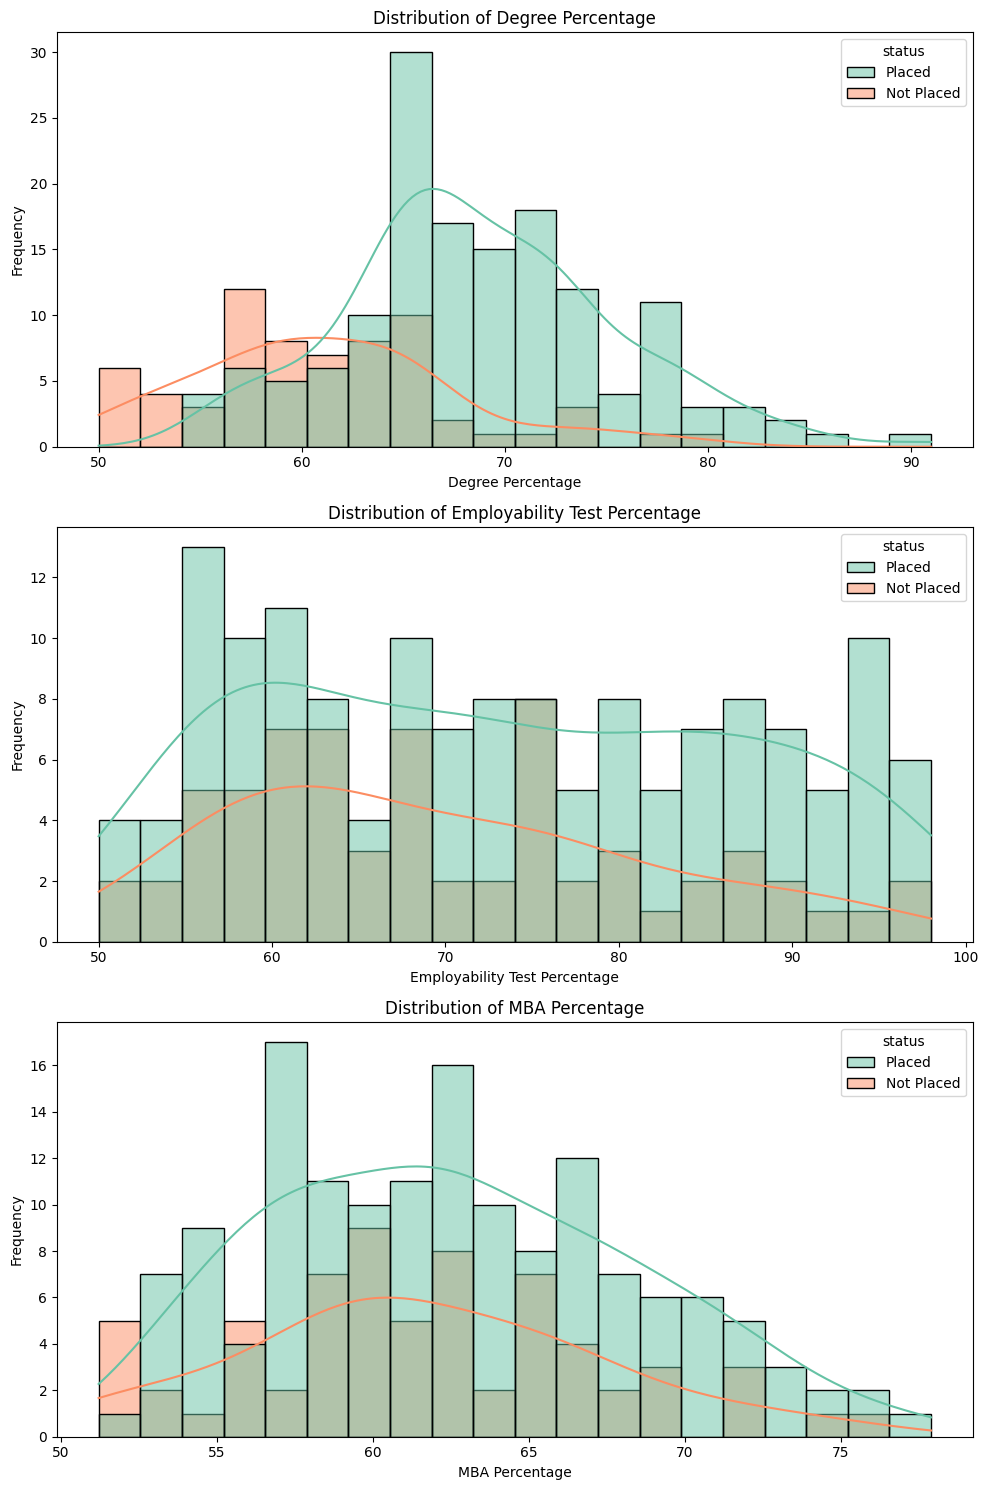

In [16]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot histograms for degree percentage, employability test percentage, and MBA percentage
sns.histplot(data=df, x='degree_p', kde=True, ax=axes[0], hue='status', palette='Set2', bins=20)
axes[0].set_title('Distribution of Degree Percentage')
axes[0].set_xlabel('Degree Percentage')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='etest_p', kde=True, ax=axes[1], hue='status', palette='Set2', bins=20)
axes[1].set_title('Distribution of Employability Test Percentage')
axes[1].set_xlabel('Employability Test Percentage')
axes[1].set_ylabel('Frequency')

sns.histplot(data=df, x='mba_p', kde=True, ax=axes[2], hue='status', palette='Set2', bins=20)
axes[2].set_title('Distribution of MBA Percentage')
axes[2].set_xlabel('MBA Percentage')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**The MBA and degree percentages exhibit a normal distribution. The percentage of employability tests has a consistent distribution. The placement of candidates is influenced by the degree percentage. Employability test and MBA percentages do not influence the final product.

In [17]:
# Check for the null values in train set

# Your code goes here

# Check for null values in the train set
print("Null values in X_train:")
print(X_train.isnull().sum())

print("\nNull values in y_train:")
print(y_train.isnull().sum())


Null values in X_train:
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            55
dtype: int64

Null values in y_train:
0


In [18]:
# Check for the null values in test set

# Your code goes here

# Check for null values in the test set
print("Null values in X_test:")
print(X_test.isnull().sum())

print("\nNull values in y_test:")
print(y_test.isnull().sum())


Null values in X_test:
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            12
dtype: int64

Null values in y_test:
0


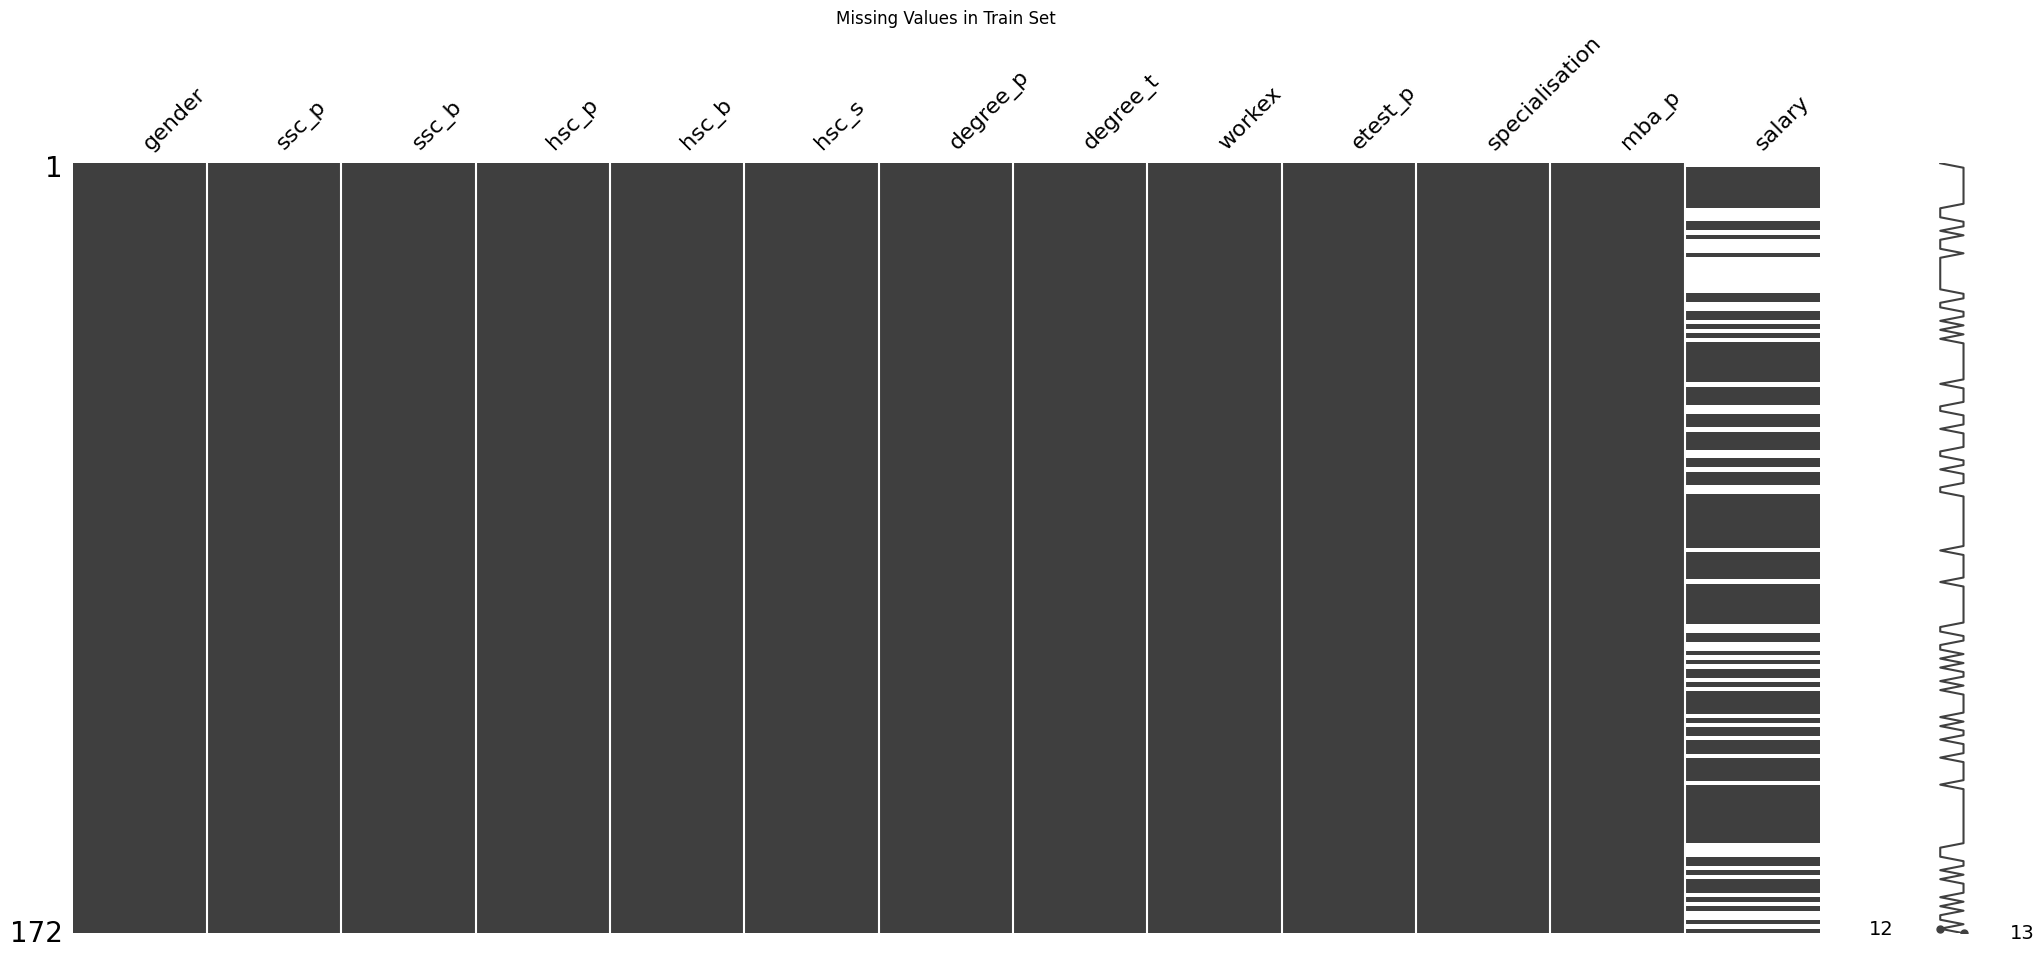

In [19]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
import missingno as msno

# Visualize missing values in the train set using matrix plot
msno.matrix(X_train)
plt.title('Missing Values in Train Set')
plt.show()


## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:**Only salary column has some missing data. In order to handle the missing values in salary column mean value is replaced with the null values. Mean captures the overall balance of the data.


In [20]:
# Handle the missing data

# Your code goes here
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [21]:
# Test the training dataset after processing the null values

# Your code goes here

# Assuming we are filling missing values with mean
# You can replace this with your chosen strategy

from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
X_train_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(X_train[numeric_cols]), columns=numeric_cols)

# Impute missing values for categorical columns with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(X_train[categorical_cols]), columns=categorical_cols)

# Concatenate imputed numerical and categorical columns
X_train_imputed = pd.concat([X_train_numeric_imputed, X_train_categorical_imputed], axis=1)

# Test the training dataset after processing the null values
print("Missing values in the processed training dataset:")
print(X_train_imputed.isnull().sum())



Missing values in the processed training dataset:
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
dtype: int64


In [22]:
# Process the null values in the test set

# Your code goes here
# Separate numerical and categorical columns in the test set
numeric_cols_test = X_test.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_test = X_test.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with mean
X_test_numeric_imputed = pd.DataFrame(numeric_imputer.transform(X_test[numeric_cols_test]), columns=numeric_cols_test)

# Impute missing values for categorical columns with most frequent
X_test_categorical_imputed = pd.DataFrame(categorical_imputer.transform(X_test[categorical_cols_test]), columns=categorical_cols_test)

# Concatenate imputed numerical and categorical columns
X_test_imputed = pd.concat([X_test_numeric_imputed, X_test_categorical_imputed], axis=1)



In [23]:
# Test the testing dataset after processing the null values

# Your code goes here

print("Missing values in the processed test dataset:")
print(X_test_imputed.isnull().sum())


Missing values in the processed test dataset:
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
dtype: int64


### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**Ordinal encoding is a suitable technique for encoding the category features. This approach reduces complexity while retaining interpretability by preserving the ordinal relationship between categories. The methodology includes managing missing values, assigning integer values to categories, and, if necessary, adding factors like category order. Features like 'degree_t' that have inherent ordinality can be handled with this method.

In [24]:
# Hint: Use Scikit-Learn library for the feature encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


# List the categorical features

# Your code goes here
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
encoder = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    remainder='passthrough'
)

# Encode the training features

# Your code goes here

X_train_encoded = encoder.fit_transform(X_train_imputed)

# Print the shape of the encoded training features
print("Shape of encoded training features:", X_train_encoded.shape)







Shape of encoded training features: (172, 22)


In [25]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here

# Convert the encoded training features to a Pandas DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded)

# Check the datatypes of the encoded training features DataFrame
print("Datatypes of the encoded training features:")
print(X_train_encoded_df.dtypes)


Datatypes of the encoded training features:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
dtype: object


In [26]:
# Encode the testing features

# Your code goes here

X_test_encoded = encoder.transform(X_test_imputed)

# Convert the encoded testing features to a Pandas DataFrame
X_test_encoded_df = pd.DataFrame(X_test_encoded)

# Check the datatypes of the encoded testing features DataFrame
print("Datatypes of the encoded testing features:")
print(X_test_encoded_df.dtypes)


Datatypes of the encoded testing features:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
dtype: object


In [27]:
# Encode the target variable in train and test sets

# Your code goes here

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable in the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Encode the target variable in the testing set
y_test_encoded = label_encoder.transform(y_test)

In [28]:
# Print the encoded labels for the training set

# Your code goes here
print("Encoded labels for the training set:")
print(y_train_encoded)

Encoded labels for the training set:
[0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1]


### Scale the Numerical Features

In [29]:
# Standard Scale the numerical features

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training features
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test_encoded)


In [30]:


# Convert the scaled training features back to a Pandas DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded_df.columns)

# Display the head of the scaled training set
print("Head of the scaled training set:")
print(X_train_scaled_df.head())



Head of the scaled training set:
         0         1         2         3         4         5         6   \
0 -0.722581  0.722581  0.965704 -0.965704  1.315355 -1.315355 -0.261387   
1 -0.722581  0.722581  0.965704 -0.965704 -0.760251  0.760251 -0.261387   
2 -0.722581  0.722581  0.965704 -0.965704 -0.760251  0.760251 -0.261387   
3 -0.722581  0.722581 -1.035514  1.035514  1.315355 -1.315355 -0.261387   
4 -0.722581  0.722581 -1.035514  1.035514 -0.760251  0.760251 -0.261387   

         7         8         9   ...        12        13        14        15  \
0  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026 -1.137248  1.137248   
1 -1.059932  1.207122 -1.458517  ... -1.420403  1.420403  0.879316 -0.879316   
2  0.943456 -0.828417  0.685628  ... -1.420403  1.420403  0.879316 -0.879316   
3  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026 -1.137248  1.137248   
4  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026  0.879316 -0.879316   

         16        17        18    

In [31]:


# Convert the scaled testing features back to a Pandas DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded_df.columns)

# Display the head of the scaled testing set
print("Head of the scaled testing set:")
print(X_test_scaled_df.head())


Head of the scaled testing set:
         0         1         2         3         4         5         6   \
0 -0.722581  0.722581 -1.035514  1.035514 -0.760251  0.760251 -0.261387   
1 -0.722581  0.722581 -1.035514  1.035514 -0.760251  0.760251 -0.261387   
2  1.383927 -1.383927 -1.035514  1.035514 -0.760251  0.760251 -0.261387   
3  1.383927 -1.383927  0.965704 -0.965704 -0.760251  0.760251 -0.261387   
4  1.383927 -1.383927  0.965704 -0.965704  1.315355 -1.315355 -0.261387   

         7         8         9   ...        12        13        14        15  \
0  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026  0.879316 -0.879316   
1  0.943456 -0.828417  0.685628  ... -1.420403  1.420403  0.879316 -0.879316   
2 -1.059932  1.207122 -1.458517  ... -1.420403  1.420403  0.879316 -0.879316   
3  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026 -1.137248  1.137248   
4  0.943456 -0.828417  0.685628  ... -1.420403  1.420403  0.879316 -0.879316   

         16        17        18     

From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**<br>
SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm used for oversampling the minority class in imbalanced classification problems. It generates synthetic samples by interpolating between minority class instances and their nearest neighbors in feature space, thereby alleviating class imbalance and improving model performance.


> **A2 (Advantage):**
The primary advantage of using SMOTE over other oversampling techniques is that it generates synthetic samples rather than simply replicating existing minority class instances. This introduces diversity into the training data, helping to mitigate overfitting and improving the generalization performance of machine learning models on imbalanced datasets. Additionally, SMOTE can effectively address class imbalance without significantly increasing the risk of model overfitting, making it a preferred choice in practice.

In [32]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Perform oversampling on the training features and target
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train_encoded)


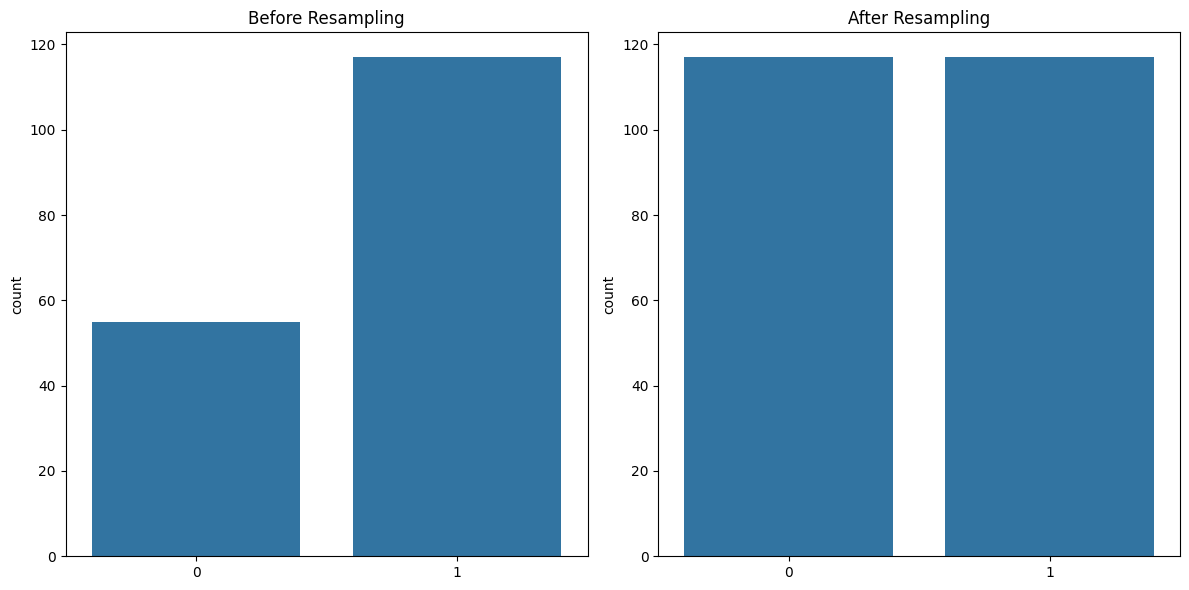

In [33]:
# plot the count plots side by side before and after resampling

# Your code goes here
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot countplot before resampling
sns.countplot(x=y_train_encoded, ax=axes[0])
axes[0].set_title('Before Resampling')

# Plot countplot after resampling
sns.countplot(x=y_train_oversampled, ax=axes[1])
axes[1].set_title('After Resampling')

# Show the plots
plt.tight_layout()
plt.show()

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**
 No, the purpose of the testing set is to evaluate the model's performance. By oversampling it we cannot get an idea how the model perform with the unseen real-world data.

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [34]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline


In [35]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# Define imbalanced-learn pipeline
imbpipeline = make_imb_pipeline(SMOTE(random_state=42), SVC())


In [36]:
# Define stratified k-fold cross validation with five folds

# Your code goes here
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**Stratified K-Folds cross-validation is crucial for unbiased model evaluation, particularly with imbalanced datasets. It ensures each fold maintains the same class distribution as the original data, preventing biased performance estimates. This leads to more reliable model evaluation and selection, improving generalization across diverse subsets of the data.

In [37]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here
# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly']
}


In [38]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here
from sklearn.model_selection import GridSearchCV

# Define GridSearchCV instance
grid_search = GridSearchCV(imbpipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)


In [39]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here

grid_search.fit(X_train_scaled, y_train_encoded)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [40]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here

print("Mean Cross-Validated Score of the Best Estimator (Accuracy):", grid_search.best_score_)



Mean Cross-Validated Score of the Best Estimator (Accuracy): 0.8489075630252101


In [41]:
# Print the best hyper parameters detected from the grid search

# Your code goes here

print("Best Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}


In [42]:
# Obtain the best estimator selected from the grid search

# Your code goes here

best_estimator = grid_search.best_estimator_


### Model Evaluation

In [43]:
# Fit the best estimator to the whole training dataset

# Your code goes here

best_estimator.fit(X_train_scaled, y_train_encoded)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('svc', SVC(C=10, gamma=0.1, kernel='poly'))])

In [44]:
# Calculate the accuracy considering the complete traing set

# Your code goes here

train_accuracy = best_estimator.score(X_train_scaled, y_train_encoded)
print("Accuracy on the complete training set:", train_accuracy)


Accuracy on the complete training set: 0.9941860465116279


In [45]:
# Calculate the accuracy for the test set

# Your code goes here

test_accuracy = best_estimator.score(X_test_scaled, y_test_encoded)
print("Accuracy on the test set:", test_accuracy)


Accuracy on the test set: 0.7674418604651163


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:**Based on the accuracies obtained, there seems to be a significant difference between the accuracy on the training set (99.42%) and the test set (76.74%). Such a large gap suggests that the model may be overfitting.


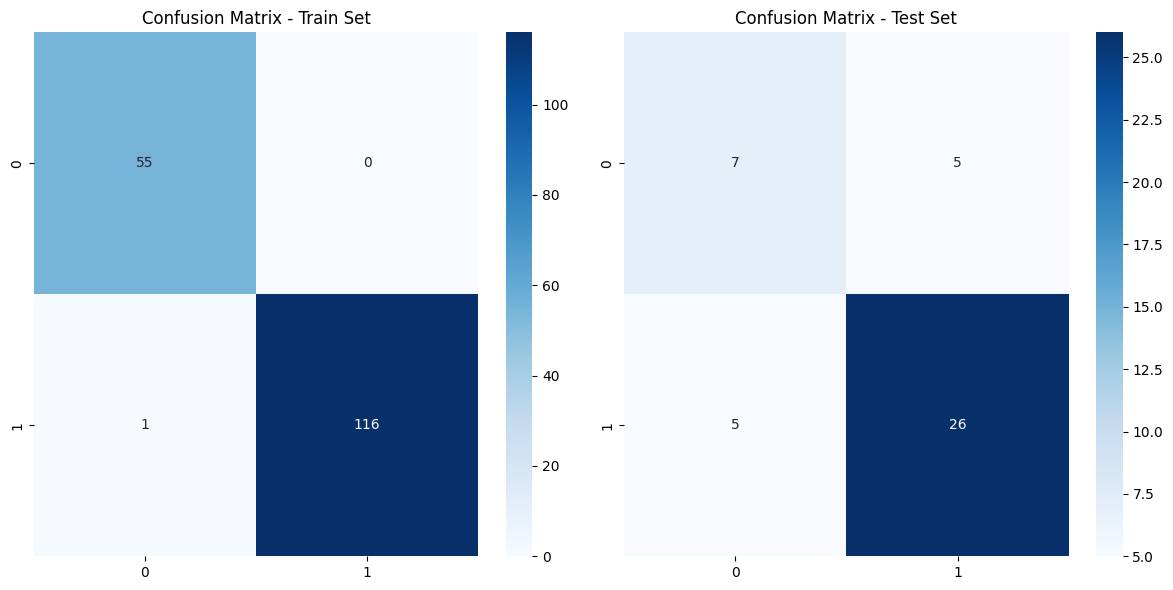

In [46]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix for the train set
train_pred = best_estimator.predict(X_train_scaled)
train_conf_matrix = confusion_matrix(y_train_encoded, train_pred)

# Generate confusion matrix for the test set
test_pred = best_estimator.predict(X_test_scaled)
test_conf_matrix = confusion_matrix(y_test_encoded, test_pred)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for train set
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Train Set')

# Plot confusion matrix for test set
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')

# Show the plots
plt.tight_layout()
plt.show()


**Q:** Comment about the obtained confusion matrices. <br>
> **A:**Both the matrices have high true positive rate and low false positive rate. According to the matrices, the model has correctly predicted the most instances. The train set has the accuracy of 0.994 and the test set has 0.767

In [47]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here
from sklearn.metrics import classification_report

# Generate classification report for the test set
report = classification_report(y_test_encoded, test_pred)

# Print the classification report
print("Classification Report for the Test Set:")
print(report)


Classification Report for the Test Set:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.84      0.84      0.84        31

    accuracy                           0.77        43
   macro avg       0.71      0.71      0.71        43
weighted avg       0.77      0.77      0.77        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.

> **A:**
* According to the classification report the model has a good precision for both classes. The precision tells the accuracy of positive predictions made by the model.
* Both the classes have good recall. This tells the ability to find the all positive instances.
* The f1-score is important since there is a imbalance between positive and negative classes. In our trained model, there is a good f1-score for both both classes.

Area Under Curve (AUC) value: 0.8091397849462366


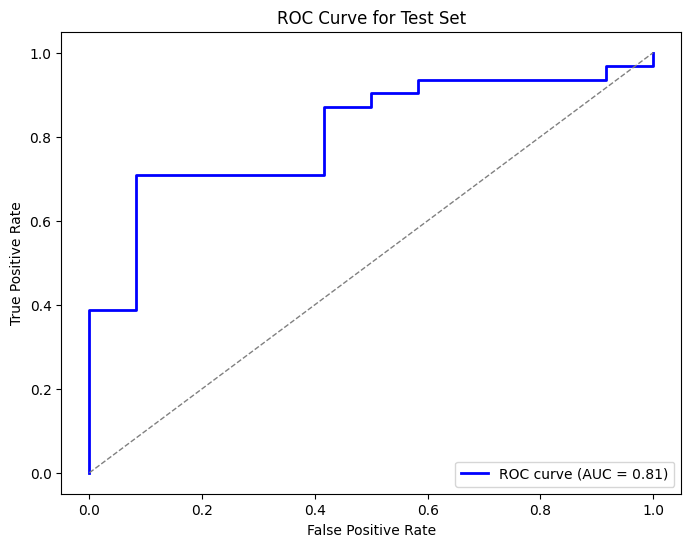

In [48]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here

from sklearn.metrics import roc_curve, auc

# Obtain decision scores instead of predicted probabilities
y_test_scores = best_estimator.decision_function(X_test_scaled)

# Calculate fpr and tpr
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_scores)

# Calculate AUC
auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc='lower right')

# Print AUC value
print("Area Under Curve (AUC) value:", auc_value)

# Show plot
plt.show()




**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**The ROC curve and AUC value are used to evaluate the performance of binary classification models. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR), showing how well the model distinguishes between positive and negative instances. The AUC value summarizes the model's performance across all classification thresholds, with a higher AUC indicating better performance.

In the provided ROC curve with an AUC of 0.809:

- The curve starts near the bottom left corner and rises steeply, indicating good performance in identifying true positives without many false positives.
- However, as the curve levels off and bends towards the bottom right corner, the model struggles to identify additional true positives without increasing false positives.

Overall, the model has moderate ability to distinguish between positive and negative classes, with strengths and weaknesses in correctly identifying true positives and minimizing false positives. The interpretation of the AUC value and ROC curve should consider the specific context of the task and dataset.